# **Free Fall Simulation of 20-Peso Coins on Different Planets in Our Solar System**

## Introduction
<div style="text-align: justify;">
 The study of free fall is an essential part of understanding gravitational forces and their effect on objects. Objects of the same mass, such as a coin, will fall at different rates depending on the planet's gravitational pull. Gravitational acceleration is a key factor in determining the speed at which an object falls toward the surface of a celestial body. On Earth, we are accustomed to the acceleration due to gravity being approximately 9.81 m/s². However, this value varies greatly across different planets in our solar system, influencing the rate at which objects fall.
</div>

## Planets in the Simulation:
- **Mercury**: Gravity = 3.7 m/s²
- **Venus**: Gravity = 8.87 m/s²
- **Earth**: Gravity = 9.81 m/s²
- **Mars**: Gravity = 3.71 m/s²
- **Jupiter**: Gravity = 24.79 m/s²
- **Saturn**: Gravity = 10.44 m/s²
- **Uranus**: Gravity = 8.69 m/s²
- **Neptune**: Gravity = 11.15 m/s²
- **Pluto**: Gravity = 0.62 m/s²

## How the Simulation Works:
The simulation uses the following equations to calculate the fall of a 20-Peso coin from a height of 100 meters.

### 1. Equation for Height (\(yf\)):
$$
y_f = y_0 + v_0 t + \frac{1}{2} g t^2
$$

Where:
- \(yf\) is the height of the object at any given time.
- \(y0\) is the initial height (100 meters in this case).
- \(v0\) is the initial velocity (0 m/s, since the coin is initially at rest).
- \(g\) is the gravitational acceleration for the planet.
- \(t\) is the time in seconds.

### 2. Equation for Velocity (\(vf\)):

$$
vf = v0 + g t
$$

Where:
- \(vf\) is the velocity of the object at any given time.
- \(v0\) is the initial velocity (0 m/s, since the coin is initially at rest).
- \(g\) is the gravitational acceleration for the planet.
- \(t\) is the time in seconds.

## Explanation of the Calculation Using Earth as an Example (Coin Reaching the Ground)

In this section, we will walk through the calculation for Earth, where the gravitational acceleration \(g = 9.81 \, \text{m/s}^2\), and the coin has already reached the ground, based on the previously calculated fall time of **4.51 seconds**.

### 1. Time to Reach the Ground

The formula we use to calculate the time it takes for an object to fall to the ground is derived from the equations of motion for uniformly accelerated objects under gravity.

The general equation for the motion of an object in free fall (ignoring air resistance) is:

$$
y_f = y_0 + v_0 t + \frac{1}{2} g t^2
$$

Where:
- \(y_f\) is the final height (which will be 0 when the object hits the ground),
- \(y_0\) is the initial height from which the object is dropped (in our case, 100 meters),
- \(v_0\) is the initial velocity (which is 0 m/s since the coin is dropped and not thrown),
- \(g\) is the gravitational acceleration (9.81 m/s² on Earth),
- \(t\) is the time taken for the object to reach the ground.

Since we are dropping the object from rest (\(v_0 = 0\)), the equation simplifies to:

$$
y_f = y_0 + \frac{1}{2} g t^2
$$

Now, we know that when the object hits the ground, \(y_f = 0\). Therefore, the equation becomes:

$$
0 = y_0 + \frac{1}{2} g t^2
$$

Solving for \(t\), we rearrange the equation:

$$
\frac{1}{2} g t^2 = -y_0
$$

Multiply both sides by 2 to simplify:

$$
g t^2 = -2 y_0
$$

Now, divide both sides by \(g\):

$$
t^2 = \frac{-2 y_0}{g}
$$

Finally, take the square root of both sides:

$$
t = \sqrt{\frac{2 y_0}{g}}
$$

### Why We Use This Formula

We use this formula because it allows us to directly calculate the time it takes for an object to fall from a given height (\(y_0\)) under the influence of gravity (\(g\)), assuming the object starts from rest. In our case, the initial velocity is 0, and we know the height (\(y_0 = 100 \, \text{m}\)) and gravity on Earth (\(g = 9.81 \, \text{m/s}^2\)).

By plugging these values into the formula:

$$
t = \sqrt{\frac{2 \cdot 100}{9.81}} \approx 4.51 \, \text{seconds}
$$

We find that it takes approximately **4.51 seconds** for the coin to fall from 100 meters to the ground on Earth.


###  Final Velocity Just Before Impact:

Using the calculated fall time \(t = 4.51 \, \text{seconds}\), we can now compute the final velocity just before impact using the velocity equation:

$$
v_f = v_0 + g t
$$

Substituting the values:

$$
v_f = 0 + 9.81 \cdot 4.51 = 44.23 \, \text{m/s}
$$

So, the final velocity of the coin just before impact on Earth would be **44.23 m/s**.










In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math

planetary_gravity = {
    "Mercury": 3.7,
    "Venus": 8.87,
    "Earth": 9.81,
    "Mars": 3.71,
    "Jupiter": 24.79,
    "Saturn": 10.44,
    "Uranus": 8.69,
    "Neptune": 11.15,
}

# Simulation constants
v0 = 0  # Initial velocity (m/s)
y0 = 100  # Initial height (m)
dt = 0.5  # Time step (s)

# Create motion data for each planet
data = []
planet_data = {}

for planet, gravity in planetary_gravity.items():
    # Calculate exact free fall time and final velocity based on formulae
    fall_time = math.sqrt(2 * y0 / gravity)  # Time to fall from height y0
    final_velocity = math.sqrt(2 * gravity * y0)  # Final velocity just before impact

    # Store the planet data for the table
    data.append([planet, v0, gravity, round(fall_time, 2), round(final_velocity, 1)])

    # Simulate the motion over time
    times = []
    heights = []
    time = 0
    while time <= fall_time:
        height = y0 - 0.5 * gravity * time**2  # Calculate height at each time step
        times.append(time)
        heights.append(height)
        time += dt
    
    planet_data[planet] = {"time": times, "height": heights, "final_velocity": final_velocity}

# Create a DataFrame to represent the results as a table
df = pd.DataFrame(data, columns=["Planet", "V0 (m/s)", "G (m/s²)", "T (s)", "Vf (m/s)"])

# Sort by fall time (T)
sorted_df = df.sort_values(by='T (s)')
# Display the table
print(sorted_df)

    Planet  V0 (m/s)  G (m/s²)  T (s)  Vf (m/s)
4  Jupiter         0     24.79   2.84      70.4
7  Neptune         0     11.15   4.24      47.2
5   Saturn         0     10.44   4.38      45.7
2    Earth         0      9.81   4.52      44.3
1    Venus         0      8.87   4.75      42.1
6   Uranus         0      8.69   4.80      41.7
3     Mars         0      3.71   7.34      27.2
0  Mercury         0      3.70   7.35      27.2


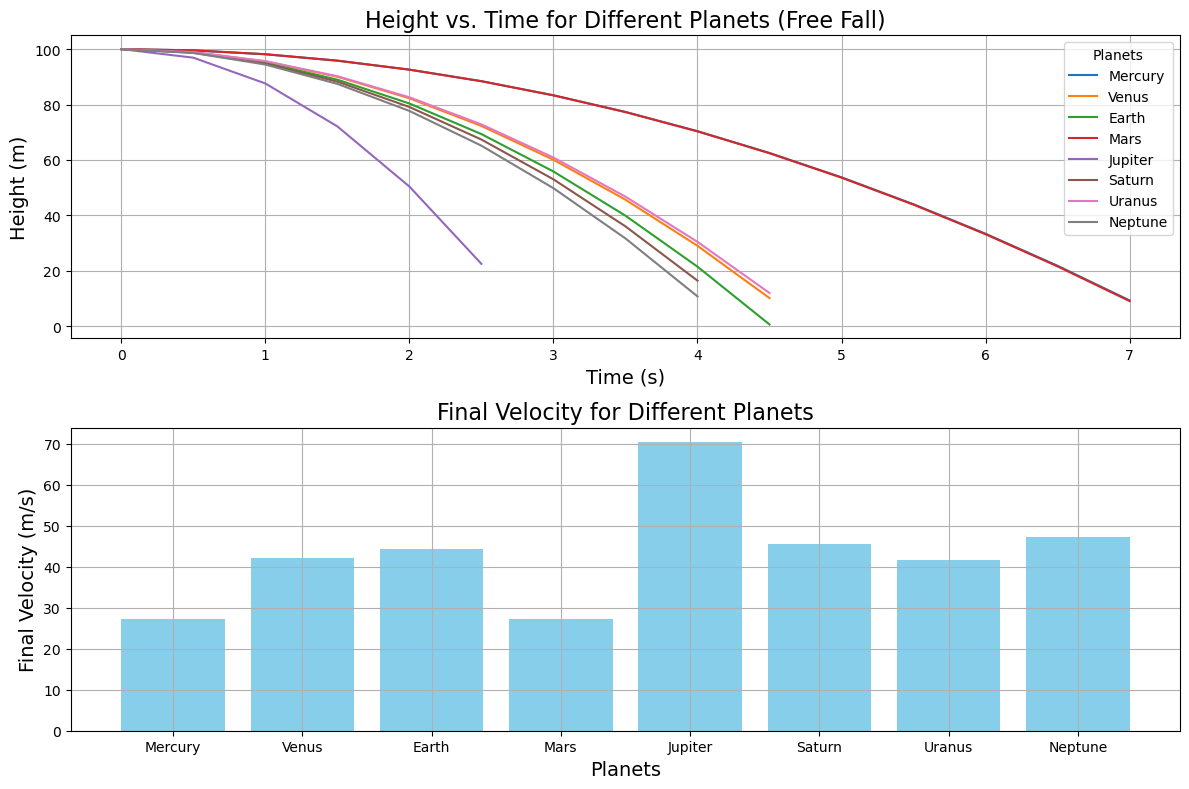

In [3]:
# Create the graph to show the motion of the coin for each planet (Height vs. Time)
plt.figure(figsize=(12, 8))

# Plot the height vs. time graph
plt.subplot(2, 1, 1)
for planet, motion_data in planet_data.items():
    plt.plot(motion_data["time"], motion_data["height"], label=planet)

plt.title("Height vs. Time for Different Planets (Free Fall)", fontsize=16)
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Height (m)", fontsize=14)
plt.legend(title="Planets")
plt.grid(True)

# Plot the final velocity graph
plt.subplot(2, 1, 2)
planets = list(planet_data.keys())
final_velocities = [planet_data[planet]["final_velocity"] for planet in planets]

plt.bar(planets, final_velocities, color='skyblue')
plt.title("Final Velocity for Different Planets", fontsize=16)
plt.xlabel("Planets", fontsize=14)
plt.ylabel("Final Velocity (m/s)", fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [4]:
import pygame

# Initialize Pygame
pygame.init()

# Screen dimensions
WIDTH, HEIGHT = 800, 600
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Coin Drop Simulation for Planets")

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GOLD = (255, 215, 0)
GRAY = (200, 200, 200)
DARK_GRAY = (100, 100, 100)

# Planetary gravities (m/s^2)
planetary_gravity = {
    "Mercury": 3.7,
    "Venus": 8.87,
    "Earth": 9.81,
    "Mars": 3.71,
    "Jupiter": 24.79,
    "Saturn": 10.44,
    "Uranus": 8.69,
    "Neptune": 11.15,
    "Pluto": 0.62,
}

# Simulation constants
y0 = 100  # Initial height (m)
v0 = 0    # Initial velocity (m/s)
dt = 0.05  # Time step (s)
pixels_per_meter = 5  # Scaling for visualization (adjust as needed)

# Coin properties
coin_radius = 15
vertical_margin = 50  # Distance from the top of the screen

# Function to reset the simulation
def reset_simulation():
    coins = []
    for i, (planet, gravity) in enumerate(planetary_gravity.items()):
        coins.append({
            "planet": planet,
            "x": 100 + i * 70,  # Horizontally spaced coins
            "y": vertical_margin,  # Starting near the top of the screen
            "v": v0,
            "g": gravity,
            "falling": True,
        })
    return coins

# Initialize coin data
coins = reset_simulation()

# Button properties
button_width = 200
button_height = 40
button_x = (WIDTH - button_width) // 2
button_y = HEIGHT - 60

# Font for labels
font = pygame.font.SysFont(None, 24)

# Main simulation loop
running = True
clock = pygame.time.Clock()

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

        elif event.type == pygame.MOUSEBUTTONDOWN:
            # Check if the button was clicked
            mouse_x, mouse_y = event.pos
            if button_x <= mouse_x <= button_x + button_width and button_y <= mouse_y <= button_y + button_height:
                coins = reset_simulation()  # Reset the simulation

    # Clear screen
    screen.fill(BLACK)

    # Update coin positions and draw them
    for coin in coins:
        if coin["falling"]:
            coin["v"] += coin["g"] * dt  # Update velocity
            coin["y"] += coin["v"] * dt * pixels_per_meter  # Update position

            if coin["y"] >= HEIGHT - coin_radius:  # Check if coin hits the ground
                coin["y"] = HEIGHT - coin_radius
                coin["falling"] = False  # Stop falling when it hits the ground

        # Draw the coin
        pygame.draw.circle(screen, GOLD, (int(coin["x"]), int(coin["y"])), coin_radius)

        # Draw the planet label
        label = font.render(coin["planet"], True, WHITE)
        screen.blit(label, (coin["x"] - coin_radius, coin["y"] + coin_radius + 5))

    # Draw the "Restart Simulation" button
    pygame.draw.rect(screen, GRAY, (button_x, button_y, button_width, button_height))
    button_text = font.render("Restart Simulation", True, BLACK)
    screen.blit(button_text, (button_x + 20, button_y + 10))

    # Highlight button on hover
    mouse_x, mouse_y = pygame.mouse.get_pos()
    if button_x <= mouse_x <= button_x + button_width and button_y <= mouse_y <= button_y + button_height:
        pygame.draw.rect(screen, DARK_GRAY, (button_x, button_y, button_width, button_height), 3)

    # Update display
    pygame.display.flip()


    # Control the frame rate
    clock.tick(60)

pygame.quit()

pygame 2.6.1 (SDL 2.28.4, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html
